# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#api_key = "enter key here"


## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

641

In [16]:
# Get Weather Data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4))

{
    "coord": {
        "lon": 63.1206,
        "lat": 52.9594
    },
    "weather": [
        {
            "id": 800,
            "main": "Clear",
            "description": "clear sky",
            "icon": "01n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 54.5,
        "feels_like": 53.13,
        "temp_min": 54.5,
        "temp_max": 54.5,
        "pressure": 1011,
        "humidity": 74,
        "sea_level": 1011,
        "grnd_level": 992
    },
    "visibility": 10000,
    "wind": {
        "speed": 7.38,
        "deg": 265,
        "gust": 14.09
    },
    "clouds": {
        "all": 0
    },
    "dt": 1630791289,
    "sys": {
        "country": "KZ",
        "sunrise": 1630803867,
        "sunset": 1630852109
    },
    "timezone": 21600,
    "id": 1519843,
    "name": "Rudnyy",
    "cod": 200
}


In [17]:
print(requests.get(query_url + city))

<Response [200]>


In [18]:
city_name = []
country = []
date = []
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []

# Processing Record Counter Starting a 1
processing_record = 1

# Print Starting Log Statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Loop Through List of Cities & Perform a Request for Data on Each
for city in cities:

# Exception Handling
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {processing_record} | {city_record}")
        
        # Increase Processing Record Counter by 1 For Each Loop
        processing_record += 1
        
    except:
        print("City not found. Skipping...") 
    continue

# Print Ending Log Statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Porcia
Processing Record 2 | Rikitea
Processing Record 3 | Ushuaia
Processing Record 4 | Yellowknife
Processing Record 5 | Lebu
Processing Record 6 | Mataura
Processing Record 7 | Ancud
Processing Record 8 | Qaanaaq
Processing Record 9 | Irbeyskoye
Processing Record 10 | Khatanga
Processing Record 11 | Geraldton
Processing Record 12 | Bengkulu
Processing Record 13 | Salalah
Processing Record 14 | Mazatlán
Processing Record 15 | Manggar
Processing Record 16 | Kapaa
Processing Record 17 | Grand Gaube
Processing Record 18 | Lagoa
Processing Record 19 | Hermanus
Processing Record 20 | Tasiilaq
City not found. Skipping...
Processing Record 21 | Norman Wells
City not found. Skipping...
Processing Record 22 | Mar del Plata
Processing Record 23 | Luang Prabang
Processing Record 24 | Hilo
Processing Record 25 | Touros
City not found. Skipping...
City not found. Skipping...
Processing Record 26 | Nhamundá
Processing R

Processing Record 221 | Iisalmi
Processing Record 222 | Cabo San Lucas
Processing Record 223 | Draguignan
Processing Record 224 | Boshnyakovo
Processing Record 225 | Okha
Processing Record 226 | Berdyaush
Processing Record 227 | Clearwater
Processing Record 228 | Melilla
Processing Record 229 | Bonavista
Processing Record 230 | San Andrés
City not found. Skipping...
Processing Record 231 | Saravena
Processing Record 232 | Beyneu
Processing Record 233 | Banyo
Processing Record 234 | Boyolangu
Processing Record 235 | Brae
Processing Record 236 | Noyabrsk
Processing Record 237 | Rayong
City not found. Skipping...
City not found. Skipping...
Processing Record 238 | Hisai-motomachi
Processing Record 239 | Linhares
Processing Record 240 | Hamilton
Processing Record 241 | Yulara
City not found. Skipping...
Processing Record 242 | Airai
Processing Record 243 | Cochrane
Processing Record 244 | Kulhudhuffushi
Processing Record 245 | Leningradskiy
City not found. Skipping...
Processing Record 246

Processing Record 451 | Zauralskiy
Processing Record 452 | Dingle
Processing Record 453 | Camacha
Processing Record 454 | Tarauacá
Processing Record 455 | Maïné Soroa
Processing Record 456 | Amguri
Processing Record 457 | Krivodol
Processing Record 458 | Sperchógeia
Processing Record 459 | Gawler
Processing Record 460 | Brodnica
Processing Record 461 | Tam Ky
Processing Record 462 | Brooks
Processing Record 463 | Walvis Bay
City not found. Skipping...
Processing Record 464 | Aktash
Processing Record 465 | Fare
Processing Record 466 | Gao
Processing Record 467 | Kiboga
Processing Record 468 | Dillon
Processing Record 469 | Paphos
Processing Record 470 | Ipixuna
Processing Record 471 | Santa Isabel Rio Negro
Processing Record 472 | Pangai
Processing Record 473 | Dhārūr
Processing Record 474 | Pabradė
Processing Record 475 | Puksoozero
Processing Record 476 | Constantine
Processing Record 477 | Port-Gentil
Processing Record 478 | Balvi
Processing Record 479 | Sungai Penuh
City not found. 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [55]:
weather_dict = {
    "City": city_name,
    "Country": country,
    "Date": date,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temperature": max_temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed
}

weatha = pd.DataFrame(weather_dict)
weatha.head()

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Porcia,IT,1630791396,45.9600,12.6072,68.88,75,66,1.01
1,Rikitea,PF,1630791396,-23.1203,-134.9692,74.89,71,100,8.28
2,Ushuaia,AR,1630791396,-54.8000,-68.3000,47.86,61,75,12.66
3,Yellowknife,CA,1630791397,62.4560,-114.3525,63.12,67,75,23.02
4,Lebu,CL,1630791397,-37.6167,-73.6500,53.98,82,100,14.72


In [78]:
weatha1 = weatha.loc[weatha['Humidity']<101]
weatha1 = weatha1.sort_values('Humidity', ascending=False)
weatha1.to_csv(r'C:\Users\Dan\Desktop\Homework\weatherpy-d-pranjic.csv')
weatha1

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
114,Yārāda,IN,1630791430,17.6500,83.2667,79.12,100,75,5.75
151,Grindavik,IS,1630791441,63.8424,-22.4338,55.35,100,90,36.82
49,Hambantota,LK,1630791411,6.1241,81.1185,77.34,100,40,4.61
524,Sandakan,MY,1630791552,5.8402,118.1179,74.88,100,20,2.30
445,Petropavlovsk-Kamchatskiy,RU,1630791528,53.0452,158.6483,50.59,100,0,6.71
...,...,...,...,...,...,...,...,...,...
97,Aranos,NA,1630791425,-24.1333,19.1167,62.46,15,31,9.57
188,Uyuni,BO,1630791452,-20.4597,-66.8250,56.08,14,2,6.24
532,Ada,US,1630791555,43.4166,-116.1262,87.73,11,1,4.61
512,West Wendover,US,1630791249,40.7391,-114.0733,83.41,9,1,9.22


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [57]:
#  Get the indices of cities that have humidity over 100%.


In [58]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'Latitude vs. Temperature')

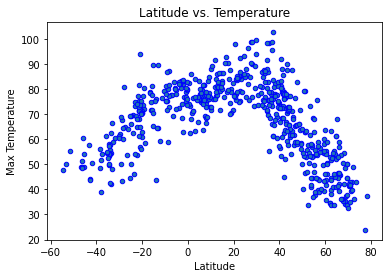

In [59]:
weatha1.plot.scatter("Latitude", "Max Temperature", edgecolors = 'b')
plt.title("Latitude vs. Temperature")

In [80]:
print(f'Here we are trying to see if there is any correllation between lattitude and Max recorded temperature, and as expected temperatures drop as we get closer to the northern and southern poles.') 


Here we are trying to see if there is any correllation between lattitude and Max recorded temperature, and as expected temperatures drop as we get closer to the northern and southern poles.


## Latitude vs. Humidity Plot

Text(0.5, 1.0, 'Latitude vs. Humidity')

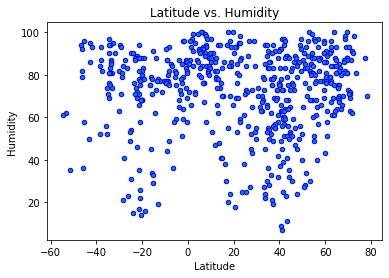

In [60]:
weatha1.plot.scatter("Latitude", "Humidity", edgecolors = 'b')
plt.title("Latitude vs. Humidity")

In [81]:
print(f'There seems to be a slight mirroring centered around the equator or line of 0 Lattitude, however further analysis is required to establish a correlation') 

There seems to be a slight mirroring centered around the equator or line of 0 Lattitude, however further analysis is required to establish a correlation


## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'Latitude vs. Cloudiness')

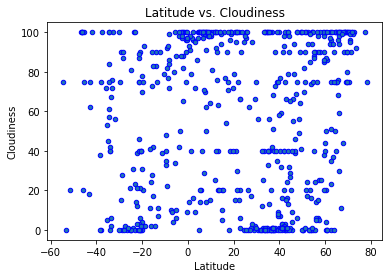

In [61]:
weatha1.plot.scatter("Latitude", "Cloudiness", edgecolors = 'b')
plt.title("Latitude vs. Cloudiness")

In [82]:
print(f'There seems to bee little to now relation between cloudiness and latitude') 

There seems to bee little to now relation between cloudiness and latitude


## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'Latitude vs. Wind Speed')

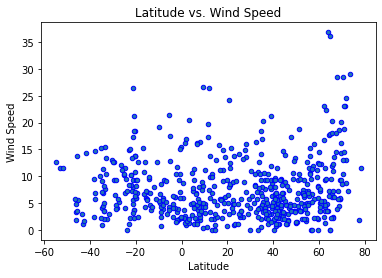

In [62]:
weatha1.plot.scatter("Latitude", "Wind Speed", edgecolors = 'b')
plt.title("Latitude vs. Wind Speed")

In [83]:
print(f'Wind speed and latitude seem to not have a lot of correlation, lower wind speeds are more common and it would seem that there are specific places that have more winds than average') 

Wind speed and latitude seem to not have a lot of correlation, lower wind speeds are more common and it would seem that there are specific places that have more winds than average


## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(0.5, 1.0, 'Northern Hemisphere - Latitude vs. Temperature')

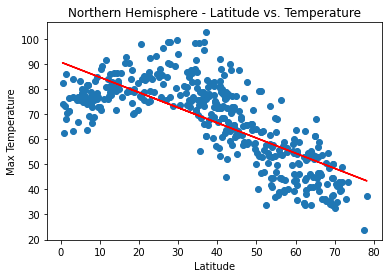

In [72]:
northernheat = weatha1.loc[weatha1['Latitude']>=0]
northernheat.plot.scatter("Latitude", "Max Temperature", edgecolors = 'b')
correlation = st.pearsonr(northernheat["Latitude"], northernheat["Max Temperature"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(northernheat["Latitude"], northernheat["Max Temperature"])
regress_values = northernheat["Latitude"] * slope + intercept
plt.scatter(northernheat["Latitude"], northernheat["Max Temperature"])
plt.plot(northernheat["Latitude"],regress_values,"r-")


plt.title("Northern Hemisphere - Latitude vs. Temperature")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(0.5, 1.0, 'Southern - Latitude vs. Temperature')

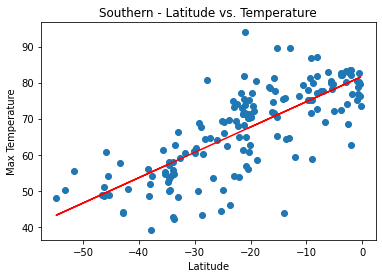

In [64]:
southernheat = weatha1.loc[weatha1['Latitude']<0]
southernheat.plot.scatter("Latitude", "Max Temperature", edgecolors = 'b')
correlation = st.pearsonr(southernheat["Latitude"], southernheat["Max Temperature"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(southernheat["Latitude"], southernheat["Max Temperature"])
regress_values = southernheat["Latitude"] * slope + intercept
plt.scatter(southernheat["Latitude"], southernheat["Max Temperature"])
plt.plot(southernheat["Latitude"],regress_values,"r-")

plt.title("Southern - Latitude vs. Temperature")

In [84]:
print(f'Temperatures are dropping as we get closer to the poles. It is interesting as we can see the tilt of the earths axis as one would think that the hottest part of the planet would be the direct middle.') 

Temperatures are dropping as we get closer to the poles. It is interesting as we can see the tilt of the earths axis as one would think that the hottest part of the planet would be the direct middle.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(0.5, 1.0, 'Northern Hemisphere - Latitude vs. Humidity')

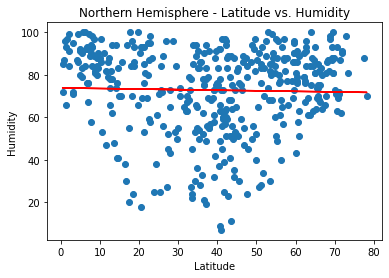

In [73]:
northernhum = weatha1.loc[weatha1['Latitude']>=0]
northernhum.plot.scatter("Latitude", "Humidity", edgecolors = 'b')
correlation = st.pearsonr(northernhum["Latitude"], northernhum["Humidity"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(northernhum["Latitude"], northernhum["Humidity"])
regress_values = northernhum["Latitude"] * slope + intercept
plt.scatter(northernhum["Latitude"], northernhum["Humidity"])
plt.plot(northernhum["Latitude"],regress_values,"r-")

plt.title("Northern Hemisphere - Latitude vs. Humidity")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(0.5, 1.0, 'Southern Hemisphere - Latitude vs. Humidity')

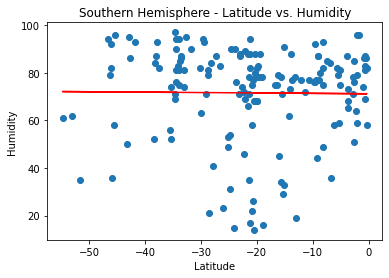

In [66]:
southernhum = weatha1.loc[weatha1['Latitude']<0]
southernhum.plot.scatter("Latitude", "Humidity", edgecolors = 'b')
correlation = st.pearsonr(southernhum["Latitude"], southernhum["Humidity"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(southernhum["Latitude"], southernhum["Humidity"])
regress_values = southernhum["Latitude"] * slope + intercept
plt.scatter(southernhum["Latitude"], southernhum["Humidity"])
plt.plot(southernhum["Latitude"],regress_values,"r-")

plt.title("Southern Hemisphere - Latitude vs. Humidity")

In [85]:
print(f'Linear regression lines shows little to now correlation between Humidity and Lattitude on either graph.') 

Linear regression lines shows little to now correlation between Humidity and Lattitude on either graph.


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(0.5, 1.0, 'Northern Hemisphere - Latitude vs. Cloudiness')

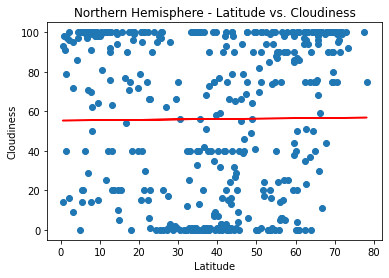

In [74]:
northerncloud = weatha1.loc[weatha1['Latitude']>=0]
northerncloud.plot.scatter("Latitude", "Cloudiness", edgecolors = 'b')
correlation = st.pearsonr(northerncloud["Latitude"], northerncloud["Cloudiness"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(northerncloud["Latitude"], northerncloud["Cloudiness"])
regress_values = northerncloud["Latitude"] * slope + intercept
plt.scatter(northerncloud["Latitude"], northerncloud["Cloudiness"])
plt.plot(northerncloud["Latitude"],regress_values,"r-")

plt.title("Northern Hemisphere - Latitude vs. Cloudiness")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(0.5, 1.0, 'Southern Hemisphere - Latitude vs. Cloudiness')

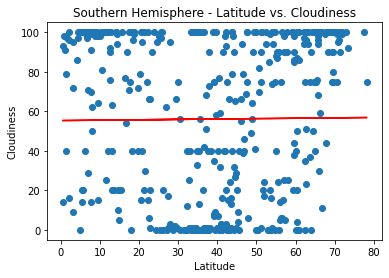

In [68]:
southerncloud = weatha1.loc[weatha1['Latitude']>0]
southerncloud.plot.scatter("Latitude", "Cloudiness", edgecolors = 'b')
correlation = st.pearsonr(southerncloud["Latitude"], southerncloud["Cloudiness"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(southerncloud["Latitude"], southerncloud["Cloudiness"])
regress_values = southerncloud["Latitude"] * slope + intercept
plt.scatter(southerncloud["Latitude"], southerncloud["Cloudiness"])
plt.plot(southerncloud["Latitude"],regress_values,"r-")

plt.title("Southern Hemisphere - Latitude vs. Cloudiness")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(0.5, 1.0, 'Northern Hemisphere - Latitude vs. Wind Speed')

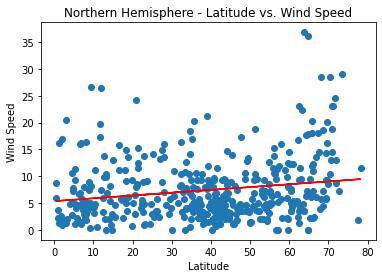

In [75]:
northernwind = weatha1.loc[weatha1['Latitude']>=0]
northernwind.plot.scatter("Latitude", "Wind Speed", edgecolors = 'b')
correlation = st.pearsonr(northernwind["Latitude"], northernwind["Wind Speed"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(northernwind["Latitude"], northernwind["Wind Speed"])
regress_values = northernwind["Latitude"] * slope + intercept
plt.scatter(northernwind["Latitude"], northernwind["Wind Speed"])
plt.plot(northernwind["Latitude"],regress_values,"r-")

plt.title("Northern Hemisphere - Latitude vs. Wind Speed")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(0.5, 1.0, 'Southern Hemisphere - Latitude vs. Wind Speed')

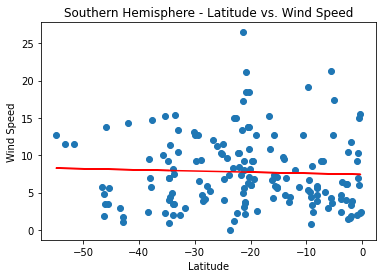

In [70]:
southernnwind = weatha1.loc[weatha1['Latitude']<0]
southernnwind.plot.scatter("Latitude", "Wind Speed", edgecolors = 'b')
correlation = st.pearsonr(southernnwind["Latitude"], southernnwind["Wind Speed"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(southernnwind["Latitude"], southernnwind["Wind Speed"])
regress_values = southernnwind["Latitude"] * slope + intercept
plt.scatter(southernnwind["Latitude"], southernnwind["Wind Speed"])
plt.plot(southernnwind["Latitude"],regress_values,"r-")

plt.title("Southern Hemisphere - Latitude vs. Wind Speed")